### Educomp 2022

In [1]:
from datetime import datetime
from django.utils.timezone import make_aware
import matplotlib.pyplot as plt

#### Usuários x semestre

In [2]:
semester_2019_2 = ("05/08/2019", "14/12/2019")
semester_ple = ("24/08/2020", "16/11/2020")
semester_2020_1 = ("30/11/2020", "06/03/2021")
semester_2020_2 = ("22/03/2021", "12/06/2021")
semester_2021_1 = ("12/07/2021", "23/10/2021")

semesters = (semester_2019_2, semester_ple, semester_2020_1, semester_2020_2, semester_2021_1)

In [3]:
exclude_onlineclass_list = [24, 11, 86, 90, 91, 94, 95]
exclude_professor = Professor.objects.values_list('user')

students_per_semester_byclass = []
students_per_semester_byenroll = []
students_per_semester_active = []
onlineclasses_total = []
for s in semesters:
    begin_date = datetime.strptime(s[0], "%d/%m/%Y")
    end_date = datetime.strptime(s[1], "%d/%m/%Y")
    
    # By class name
    onlineclasses = OnlineClass.objects.filter(start_date__gte=begin_date, start_date__lte=end_date
                                              ).exclude(pk__in=exclude_onlineclass_list)
    onlineclasses_total.append(onlineclasses.count())
    students = UserProfile.objects.filter(user_class__in=onlineclasses).exclude(user__in=exclude_professor)
    students_per_semester_byclass.append(students.count())
    
    # By enroll date
    students = User.objects.filter(date_joined__gte=make_aware(begin_date), date_joined__lte=make_aware(end_date)
                                  ).exclude(pk__in=exclude_professor)
    students_per_semester_byenroll.append(students.count())
    
    # Active at the 8th week
    students = UserLog.objects.filter(timestamp__gte=make_aware(begin_date), timestamp__lte=make_aware(end_date), 
                       problem__chapter__in=[8,9,10,17,19]).exclude(user__in=exclude_professor
                                                           ).order_by('user').values_list('user').distinct()
    students_per_semester_active.append(students.count())

In [4]:
# Dividindo os alunos da turma 55 - EM2 - Natanael (ele continuou com a mesma turma)
students_per_semester_byclass[3] += 27
students_per_semester_byclass[4] -= 27
students_per_semester_byclass

[217, 177, 429, 310, 772]

In [5]:
# Completando com queries feitas no BD já que os dados de 2019 e PLE não estão no armazenamento quente
students_per_semester_active[0] = 123
students_per_semester_active[1] = 141
students_per_semester_active

[123, 141, 361, 229, 443]

In [6]:
students_survey = [42, 101, 177, 90, 228]

print(sum(students_survey)/sum(students_per_semester_active))

for i in range(5):
    print(students_survey[i]/students_per_semester_byclass[i])
    print(students_survey[i]/students_per_semester_active[i])
    print()

0.4919043947571318
0.1935483870967742
0.34146341463414637

0.5706214689265536
0.7163120567375887

0.4125874125874126
0.4903047091412742

0.2903225806451613
0.3930131004366812

0.29533678756476683
0.5146726862302483



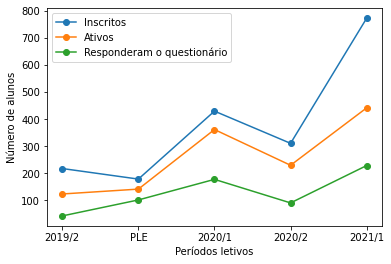

In [133]:
plt.plot(['2019/2', 'PLE', '2020/1', '2020/2', '2021/1'], students_per_semester_byclass, 'o-', label='Inscritos')
plt.plot(students_per_semester_active, 'o-', label='Ativos')
plt.plot(students_survey, 'o-', label='Responderam o questionário')
plt.legend()
plt.xlabel("Períodos letivos")
plt.ylabel("Número de alunos")
plt.show()

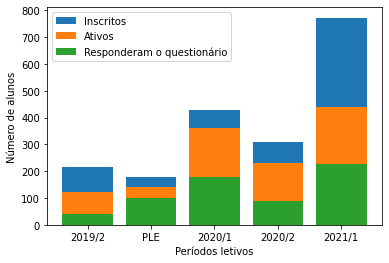

In [134]:
plt.bar(['2019/2', 'PLE', '2020/1', '2020/2', '2021/1'], students_per_semester_byclass, label='Inscritos')
plt.bar(['2019/2', 'PLE', '2020/1', '2020/2', '2021/1'], students_per_semester_active, 
        label='Ativos')
plt.bar(['2019/2', 'PLE', '2020/1', '2020/2', '2021/1'], students_survey, 
        label='Responderam o questionário')
plt.legend()
plt.xlabel("Períodos letivos")
plt.ylabel("Número de alunos")
plt.show()

In [125]:
onlineclasses_total

[7, 11, 15, 12, 22]